# kc_house_data.csv 딥러닝 회귀

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats  # 과학용 계산 라이브러리

### kc_house_data.csv 파일 불러오기

In [30]:
df = pd.read_csv("C:/Ai-class/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 결측치 확인

In [33]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

               결측치 개수  결측치 비율(%)
id                  0        0.0
date                0        0.0
price               0        0.0
bedrooms            0        0.0
bathrooms           0        0.0
sqft_living         0        0.0
sqft_lot            0        0.0
floors              0        0.0
waterfront          0        0.0
view                0        0.0
condition           0        0.0
grade               0        0.0
sqft_above          0        0.0
sqft_basement       0        0.0
yr_built            0        0.0
yr_renovated        0        0.0
zipcode             0        0.0
lat                 0        0.0
long                0        0.0
sqft_living15       0        0.0
sqft_lot15          0        0.0


### 필요없는 컬럼 제거 (id, date)

In [36]:
df = df.drop(columns=['id', 'date'])
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### 상관 관계 히트맵 출력

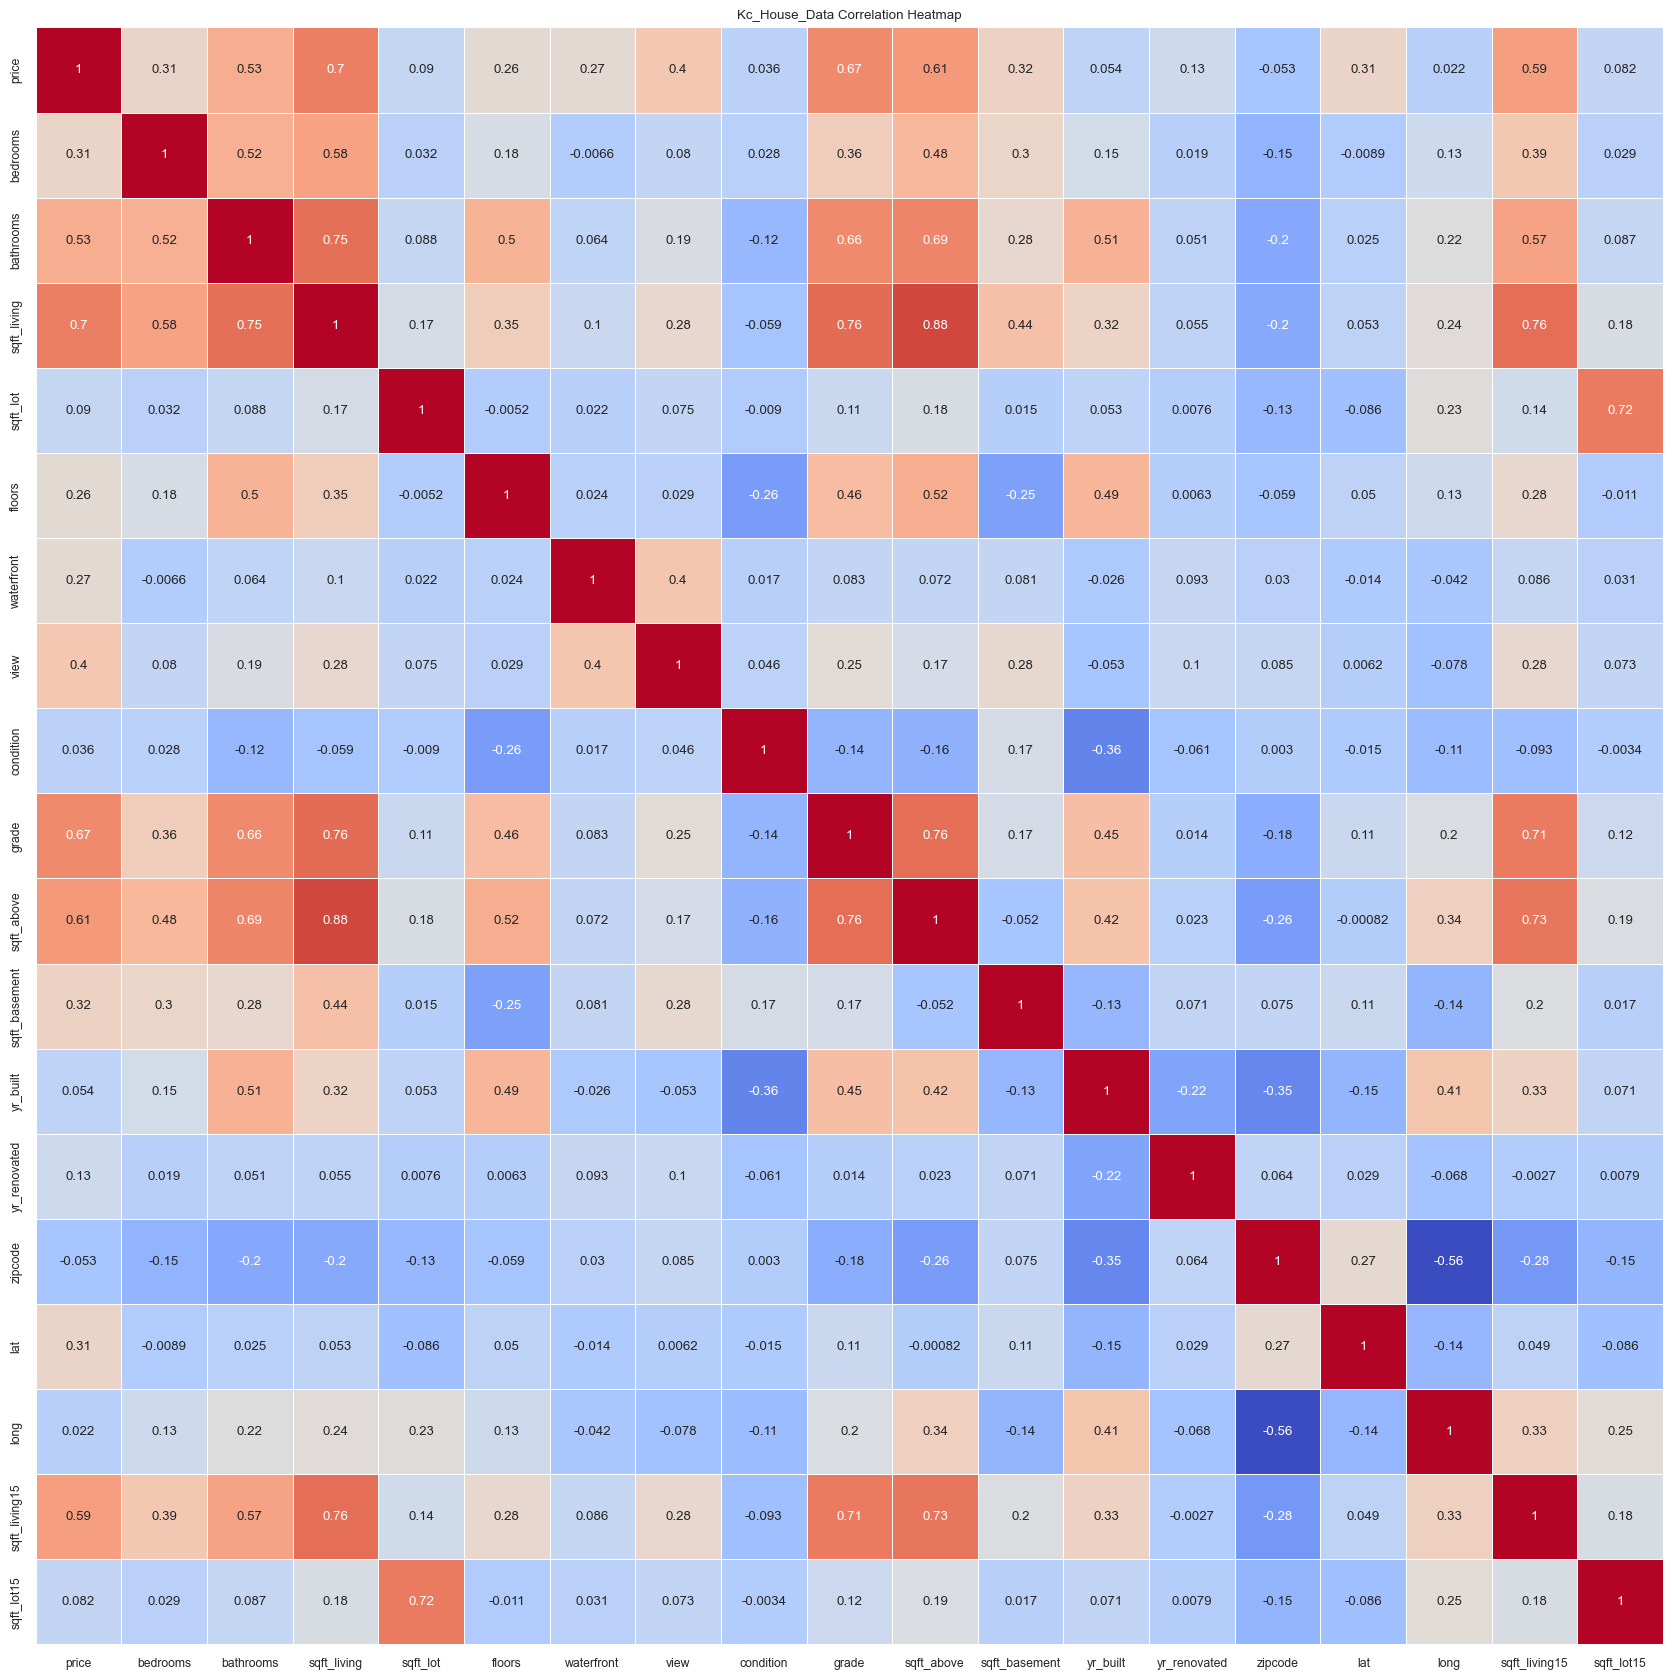

In [39]:
# 상관 관계 행렬 계산
df_corr = df.corr()

# 히트맵 출력
plt.figure(figsize=(21, 21))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title("Kc_House_Data Correlation Heatmap")
plt.show()

### Price와 상관관계를 가지고 있지 않는 컬럼 삭제 (0.25 이하)
#### sqft_lot, condition, yr_built, yr_renovated, zipcode, long, sqft_lot15

In [42]:
df = df.drop(columns=['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15'])
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')


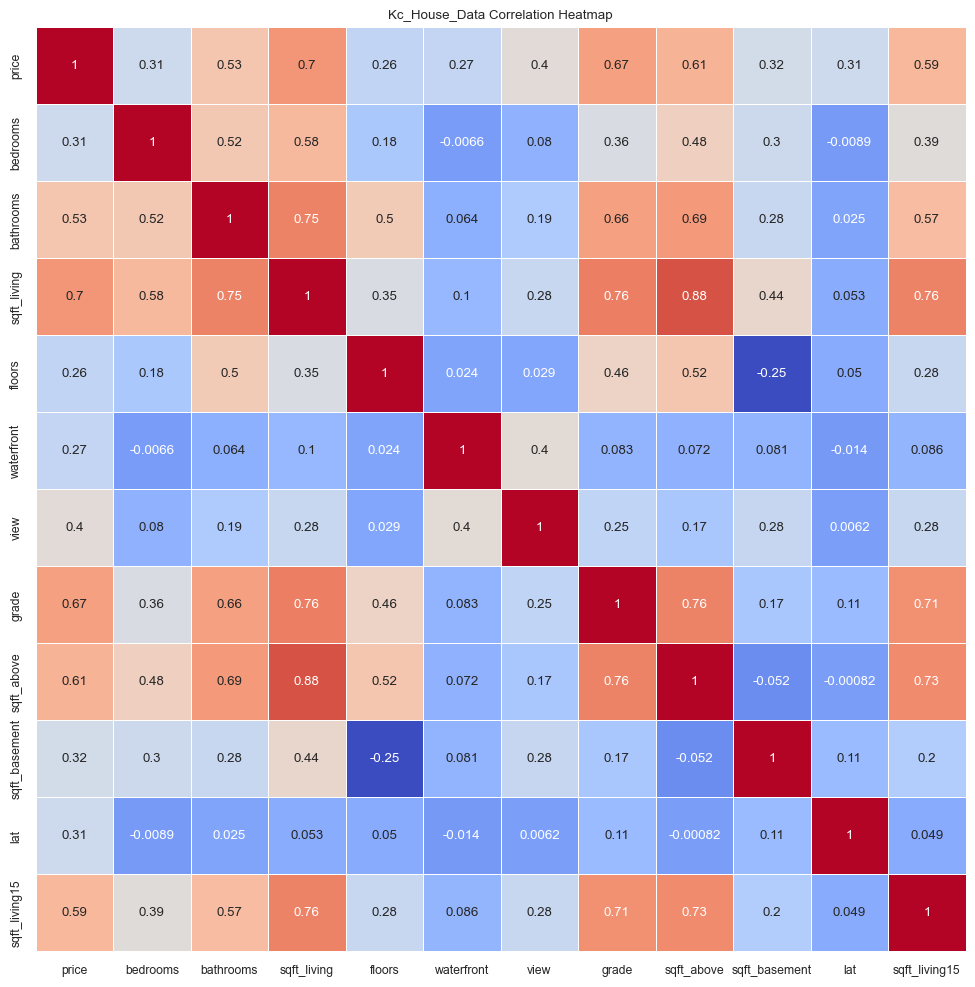

In [44]:
df_corr = df.corr()

# 히트맵 출력
plt.figure(figsize=(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title("Kc_House_Data Correlation Heatmap")
plt.show()

### 특성과 타겟 분리 

In [47]:
X = df.drop('price',axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


In [49]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### 필요 라이브러리

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

### X,y 훈련 데이터, 테스트 데이터 분리

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 11) (17290,)
(4323, 11) (4323,)


### LR 

In [64]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
ly_preds = LR_model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 54784903320.16354


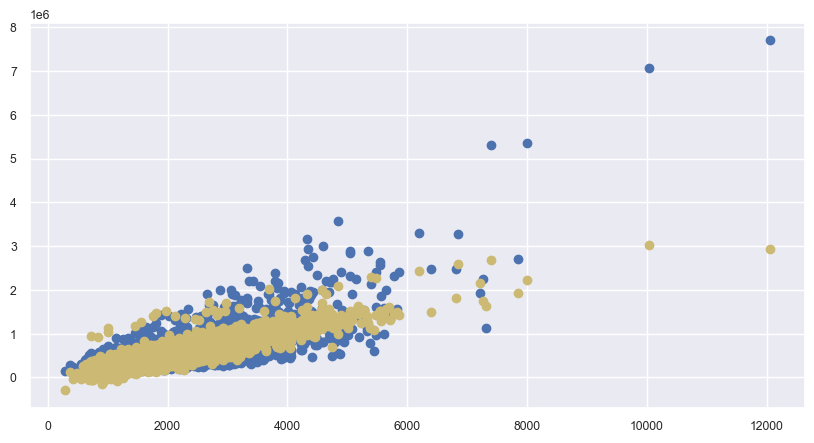

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sqft_living'], y_test, label='y_test')
plt.scatter(X_test['sqft_living'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

### DT

In [69]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

dy_preds = DT_model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 50840466983.59639


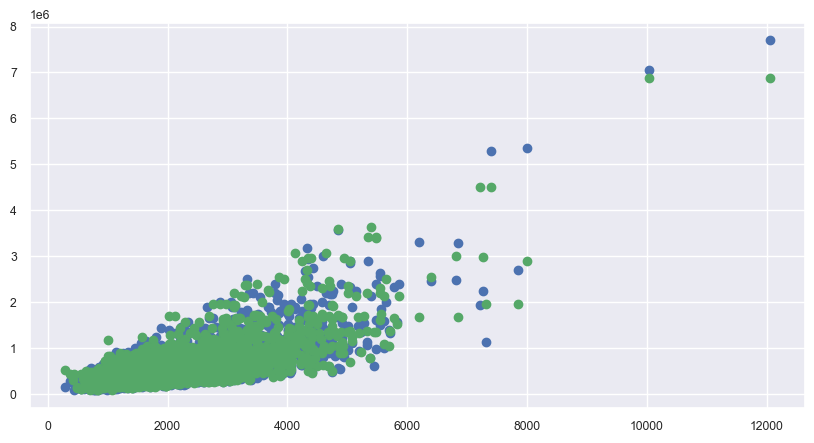

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sqft_living'], y_test, label='y_test')
plt.scatter(X_test['sqft_living'], dy_preds, c='g', label='dy_preds')
plt.show()        

### RF

In [75]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

ry_preds = RF_model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 29019184427.980526


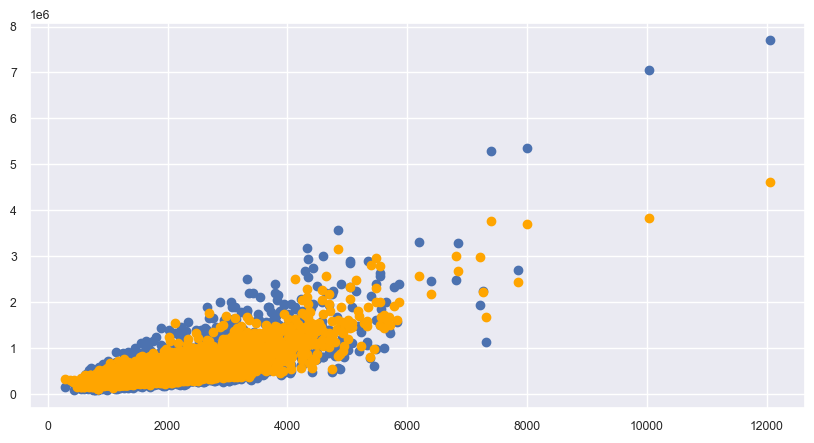

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sqft_living'], y_test, label='y_test')
plt.scatter(X_test['sqft_living'], ry_preds, c='orange', label='ry_preds')

plt.show()  

### SVM

In [80]:
SVM_model = SVR(kernel='linear')
SVM_model.fit(X_train, y_train)

ry_preds = SVM_model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 82707676421.75223


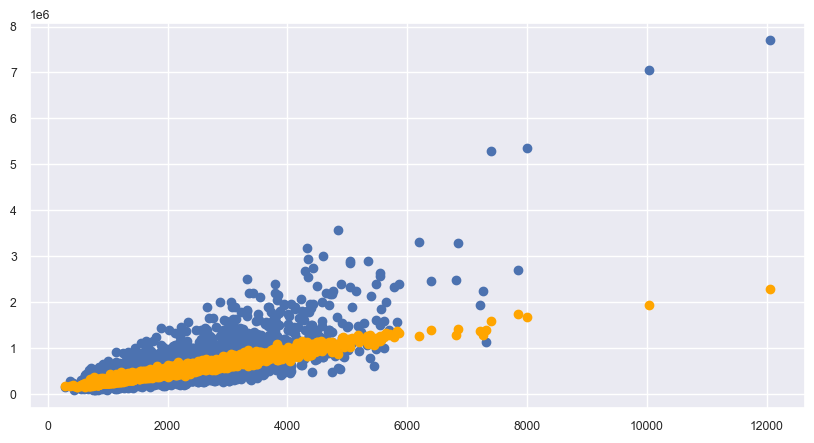

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sqft_living'], y_test, label='y_test')
plt.scatter(X_test['sqft_living'], ry_preds, c='orange', label='ry_preds')

plt.show()  

## 딥러닝 회귀

### 필요 라이브러리

In [86]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### 데이터 스케일링

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 모델 학습

In [120]:
model = Sequential()

model.add(Dense(20, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate = 0.01), 'mse')

model.summary()

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,121 (8.29 KB)

 Trainable params: 2,121 (8.29 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
#예측 시작
model_history = model.fit(x = X_train, y = y_train, epochs = 20, batch_size = 23, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

print("예측값:", y_pred)
print("실제값:", y_test)

Epoch 1/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 172857507840.0000 - val_loss: 47657349120.0000
Epoch 2/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43619655680.0000 - val_loss: 52651368448.0000
Epoch 3/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41277517824.0000 - val_loss: 46253477888.0000
Epoch 4/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38546264064.0000 - val_loss: 46541660160.0000
Epoch 5/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38580064256.0000 - val_loss: 45584453632.0000
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36587257856.0000 - val_loss: 47935074304.0000
Epoch 7/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40141135872.0000 - val_loss: 45515976704.0000
Epoch 8/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37246341120.0000 - val_loss: 46236860416.0000
Epoch 9/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39598477312.0000 - val_loss: 44730830848.0000
Epoch 10/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2

### 결과 출력

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


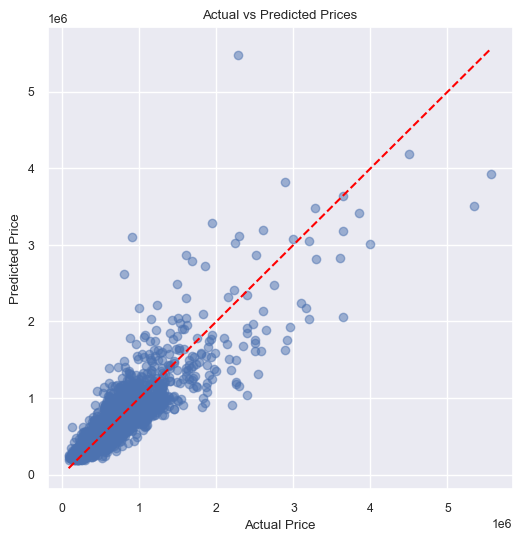

In [125]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # 대각선 기준선
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.show()

y_pred = model.predict(X_test).flatten()
plot_predictions(y_test, y_pred)